In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('Diseases.db')
cur = conn.cursor()
cur.execute('select * from Diseases;')
rows = cur.fetchall()
row = cur.fetchone()
conn.close()

In [4]:
for row in rows:
    print(row)

(1, 'Acne', 'No', 'No', 'Yes', 'No', 40, 'Male', 'Normal', 'Normal', 'Negative')
(2, 'Allergic Rhinitis', 'Yes', 'No', 'No', 'No', 50, 'Male', 'High', 'High', 'Negative')
(3, 'Allergic Rhinitis', 'No', 'Yes', 'Yes', 'No', 45, 'Male', 'High', 'Normal', 'Negative')
(4, 'Allergic Rhinitis', 'Yes', 'Yes', 'Yes', 'No', 45, 'Male', 'High', 'Normal', 'Positive')
(5, 'Allergic Rhinitis', 'No', 'Yes', 'No', 'No', 38, 'Female', 'Low', 'Normal', 'Negative')
(6, 'Allergic Rhinitis', 'No', 'No', 'Yes', 'No', 35, 'Female', 'Normal', 'Low', 'Negative')
(7, 'Allergic Rhinitis', 'No', 'Yes', 'Yes', 'No', 29, 'Female', 'Normal', 'Low', 'Negative')
(8, "Alzheimer's Disease", 'Yes', 'No', 'Yes', 'No', 70, 'Female', 'High', 'Normal', 'Negative')
(9, "Alzheimer's Disease", 'Yes', 'No', 'Yes', 'No', 70, 'Female', 'High', 'Normal', 'Negative')
(10, "Alzheimer's Disease", 'No', 'Yes', 'No', 'No', 65, 'Male', 'Normal', 'High', 'Positive')
(11, "Alzheimer's Disease", 'No', 'Yes', 'No', 'No', 65, 'Male', 'Normal'

In [5]:
df = pd.DataFrame(rows, columns= ['Patient_ID', 'Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender',
                                'Blood Pressure', 'Cholesterol Level', 'Outcome Variable',])
df = df.set_index('Patient_ID')
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
Patient_ID,,,,,,,,,,
1,Acne,No,No,Yes,No,40,Male,Normal,Normal,Negative
2,Allergic Rhinitis,Yes,No,No,No,50,Male,High,High,Negative
3,Allergic Rhinitis,No,Yes,Yes,No,45,Male,High,Normal,Negative
4,Allergic Rhinitis,Yes,Yes,Yes,No,45,Male,High,Normal,Positive
5,Allergic Rhinitis,No,Yes,No,No,38,Female,Low,Normal,Negative
...,...,...,...,...,...,...,...,...,...,...
345,Urinary Tract Infection (UTI),No,Yes,Yes,No,35,Male,High,High,Negative
346,Urinary Tract Infection (UTI),Yes,No,No,No,30,Female,Normal,Normal,Positive
347,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive


In [7]:
counts4 = df['Cholesterol Level'].value_counts()
counts5 = df['Disease'].value_counts()

In [133]:
#Question 19
Gender_Totals = df.groupby('Gender').size().nlargest(2)
Gender_Totals

Gender
Female    176
Male      173
dtype: int64

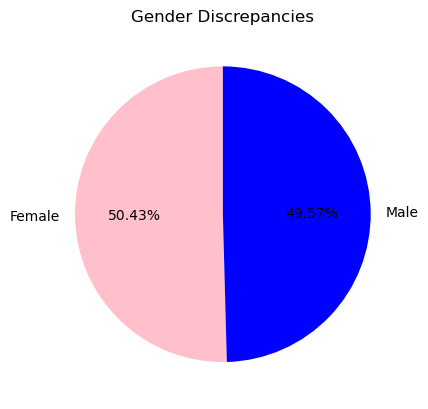

In [127]:
Genders = df['Gender'].value_counts()
cl = ['pink', 'blue']
plt.pie(Genders, labels=counts.index, autopct='%2.2f%%', colors = cl, startangle=90)
plt.title('Gender Discrepancies')
plt.ylabel('')
plt.show()

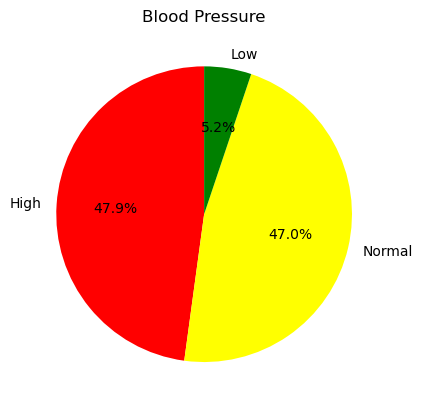

In [128]:
BP = df['Blood Pressure'].value_counts()
cl = ['Red', 'Yellow', 'Green']
exp= [0.0,0,0]
plt.pie(BP, labels=counts3.index, colors = cl, explode = exp, autopct='%1.1f%%', startangle=90)
plt.title('Blood Pressure')
plt.show()

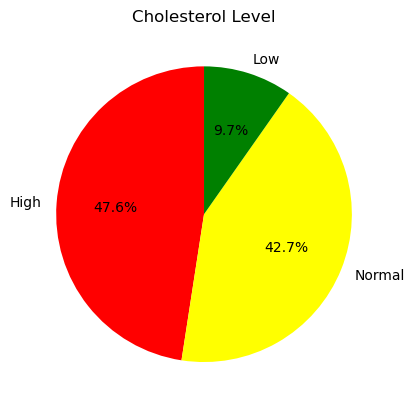

In [129]:
CL = df['Cholesterol Level'].value_counts()
cl = ['Red', 'Yellow', 'Green']
exp= [0,0,0]
plt.pie(CL, labels=counts4.index, colors = cl, explode=exp, autopct='%1.1f%%', startangle=90)
plt.title('Cholesterol Level')
plt.show()

In [25]:
import pandas as pd

# Define bins and labels
bins = [19, 41, 65, 100]
labels = ['Young Adulthood', 'Middle Age', 'Senior Citizen']

# Create bins and add a new column
df['Categories'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df.sample(20)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,categories,Categories
Patient_ID,,,,,,,,,,,,
41,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Young Adulthood,Young Adulthood
193,Liver Cancer,Yes,Yes,Yes,Yes,29,Female,Normal,Normal,Positive,Young Adulthood,Young Adulthood
262,Pancreatitis,Yes,No,No,No,29,Female,High,Normal,Negative,Young Adulthood,Young Adulthood
33,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative,Young Adulthood,Young Adulthood
117,Eczema,No,Yes,Yes,No,30,Male,High,High,Negative,Young Adulthood,Young Adulthood
195,Liver Cancer,Yes,Yes,No,No,38,Female,High,Normal,Negative,Young Adulthood,Young Adulthood
39,Asthma,Yes,Yes,Yes,Yes,30,Female,Normal,Normal,Positive,Young Adulthood,Young Adulthood
291,Rheumatoid Arthritis,No,Yes,No,No,50,Female,Low,Normal,Negative,Middle Age,Middle Age
13,Anemia,No,No,Yes,No,50,Male,Normal,Normal,Negative,Middle Age,Middle Age


In [27]:
df=df.drop('categories', axis = 1)

In [28]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Categories
Patient_ID,,,,,,,,,,,
1,Acne,No,No,Yes,No,40,Male,Normal,Normal,Negative,Young Adulthood
2,Allergic Rhinitis,Yes,No,No,No,50,Male,High,High,Negative,Middle Age
3,Allergic Rhinitis,No,Yes,Yes,No,45,Male,High,Normal,Negative,Middle Age
4,Allergic Rhinitis,Yes,Yes,Yes,No,45,Male,High,Normal,Positive,Middle Age
5,Allergic Rhinitis,No,Yes,No,No,38,Female,Low,Normal,Negative,Young Adulthood
...,...,...,...,...,...,...,...,...,...,...,...
345,Urinary Tract Infection (UTI),No,Yes,Yes,No,35,Male,High,High,Negative,Young Adulthood
346,Urinary Tract Infection (UTI),Yes,No,No,No,30,Female,Normal,Normal,Positive,Young Adulthood
347,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive,Senior Citizen


In [218]:
Top10_Diseases = df.groupby('Disease').size().nlargest(10)
Top10_DF = pd.DataFrame(Top10_Diseases).reset_index()
Top10_DF.rename(columns={0: 'Count'}, inplace=True)
Top10_DF

,Disease,Count
0,Asthma,23
1,Stroke,16
2,Osteoporosis,14
3,Diabetes,10
4,Hypertension,10
5,Migraine,10
6,Bronchitis,8
7,Influenza,8
8,Pneumonia,8
9,Hyperthyroidism,7


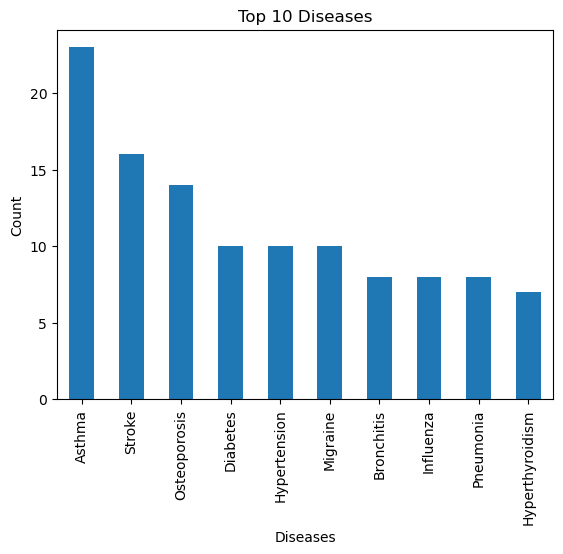

In [222]:
Top10_DF.plot(kind='bar', x='Disease', y='Count', legend=False)
plt.xlabel('Diseases')
plt.ylabel('Count')
plt.title('Top 10 Diseases')
plt.show()

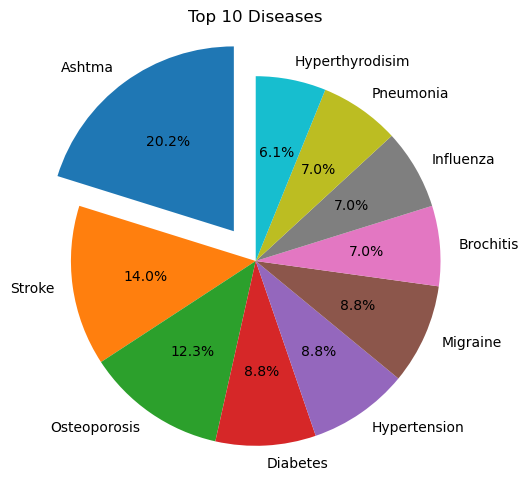

In [116]:
Values = ['Ashtma','Stroke','Osteoporosis','Diabetes', 'Hypertension', 'Migraine', 'Brochitis', 'Influenza', 'Pneumonia', 'Hyperthyrodisim']
exp = [0.2,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(6,6))
plt.pie(Top10_Diseases,labels = Values, explode = exp,autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Diseases')
#plt.legend(prop={'size':5})
plt.show()

In [67]:
#Question 15
Age_Groups = df.groupby('Categories').size().nlargest(3)
Age_Groups

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\3512547122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Groups = df.groupby('Categories').size().nlargest(3)


Categories
Middle Age         161
Young Adulthood    143
Senior Citizen      45
dtype: int64

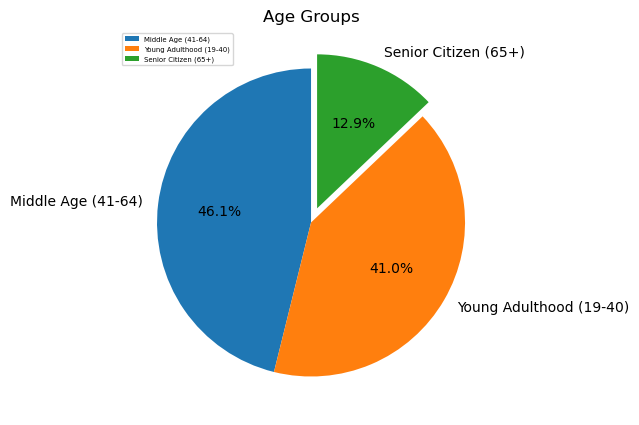

In [117]:
Values = ['Middle Age (41-64)','Young Adulthood (19-40)','Senior Citizen (65+)']
exp = [0,0,0.1]
plt.figure(figsize=(5,5))
plt.pie(Age_Groups,labels = Values, explode = exp,autopct='%1.1f%%', startangle=90)
plt.title('Age Groups')
plt.legend(prop={'size':5})
plt.show()

In [132]:
df.to_csv('PJ3_Diseases.csv', index=True)

In [143]:
breathing = df.groupby(['Categories', 'Difficulty Breathing']).size()
breathing

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\242037476.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  breathing = df.groupby(['Categories', 'Difficulty Breathing']).size()


Categories       Difficulty Breathing
Young Adulthood  No                       95
                 Yes                      48
Middle Age       No                      126
                 Yes                      35
Senior Citizen   No                       40
                 Yes                       5
dtype: int64

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\3824229520.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  breathing = df.groupby(['Categories', 'Difficulty Breathing']).size()


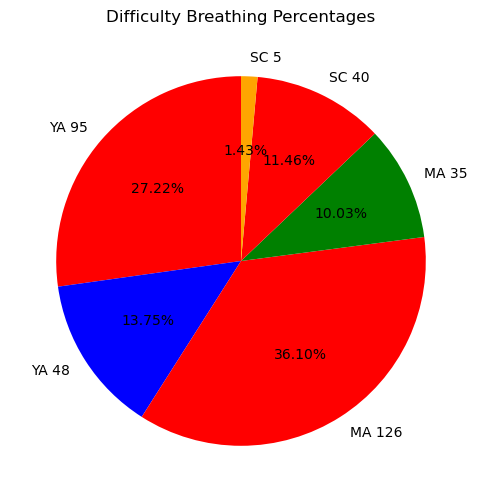

In [163]:
#Question 8
breathing = df.groupby(['Categories', 'Difficulty Breathing']).size()
values = ['YA 95', 'YA 48', 'MA 126', 'MA 35', 'SC 40','SC 5']
cl = ['red', 'blue', 'red', 'green', 'red', 'orange', ]
exp = [0,0,0,0,0,0]
plt.figure(figsize=(6,6))
plt.pie(breathing, labels=values, explode=exp, autopct='%2.2f%%', colors= cl, startangle=90)
plt.title('Difficulty Breathing Percentages')
plt.show()

In [181]:
#Question 20
admissions = df.groupby(['Categories', 'Gender']).size().nlargest(10)
admissions

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\1928897902.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  admissions = df.groupby(['Categories', 'Gender']).size()


Categories       Gender
Young Adulthood  Female    77
                 Male      66
Middle Age       Female    75
                 Male      86
Senior Citizen   Female    24
                 Male      21
dtype: int64

In [182]:
#Questions 18
Outcome_variable = df.groupby(['Categories', 'Gender', 'Outcome Variable']).size().nlargest(15)
Outcome_variable

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\3493175407.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Outcome_variable = df.groupby(['Categories', 'Gender', 'Outcome Variable']).size().nlargest(15)


Categories       Gender  Outcome Variable
Middle Age       Male    Negative            57
                 Female  Positive            48
Young Adulthood  Male    Positive            42
                 Female  Negative            39
                         Positive            38
Middle Age       Male    Positive            29
                 Female  Negative            27
Young Adulthood  Male    Negative            24
Senior Citizen   Female  Positive            20
                 Male    Negative            12
                         Positive             9
                 Female  Negative             4
dtype: int64

In [183]:
#Questions 16
Fever = df.groupby(['Gender', 'Fever']).size()
Fever

Gender  Fever
Female  No       89
        Yes      87
Male    No       85
        Yes      88
dtype: int64

In [186]:
#Questions 17
Fever = df.groupby(['Categories','Gender', 'Cholesterol Level']).size()
Fever

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\958251910.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Fever = df.groupby(['Categories','Gender', 'Cholesterol Level']).size()


Categories       Gender  Cholesterol Level
Young Adulthood  Female  High                 23
                         Low                   5
                         Normal               49
                 Male    High                 35
                         Low                   4
                         Normal               27
Middle Age       Female  High                 43
                         Low                   9
                         Normal               23
                 Male    High                 34
                         Low                  14
                         Normal               38
Senior Citizen   Female  High                 18
                         Low                   2
                         Normal                4
                 Male    High                 13
                         Low                   0
                         Normal                8
dtype: int64

In [187]:
#Question 12
Cancer = df.groupby(['Categories','Gender', 'Disease']).size()
Cancer

C:\Users\Patrick Carpenter\AppData\Local\Temp\ipykernel_20488\433987511.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Cancer = df.groupby(['Categories','Gender', 'Disease']).size()


Categories       Gender  Disease                      
Young Adulthood  Female  Acne                             0
                         Allergic Rhinitis                3
                         Alzheimer's Disease              0
                         Anemia                           0
                         Anxiety Disorders                1
                                                         ..
Senior Citizen   Male    Ulcerative Colitis               0
                         Urinary Tract Infection          0
                         Urinary Tract Infection (UTI)    1
                         Williams Syndrome                0
                         Zika Virus                       0
Length: 696, dtype: int64

In [199]:
cancer = df["Disease"][df["Disease"].str.contains("Cancer")]
cancer

Patient_ID
47        Bladder Cancer
49         Breast Cancer
72     Colorectal Cancer
123    Esophageal Cancer
178        Kidney Cancer
179        Kidney Cancer
180        Kidney Cancer
181        Kidney Cancer
182        Kidney Cancer
183        Kidney Cancer
191         Liver Cancer
192         Liver Cancer
193         Liver Cancer
194         Liver Cancer
195         Liver Cancer
196         Liver Cancer
202          Lung Cancer
203          Lung Cancer
204          Lung Cancer
256       Ovarian Cancer
257    Pancreatic Cancer
281      Prostate Cancer
321    Testicular Cancer
324       Thyroid Cancer
Name: Disease, dtype: object